In [2]:
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision import datasets, transforms, models
from torchvision.transforms.functional import *

from collections import defaultdict, deque
import itertools

import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data
import torch

from classy_vision.dataset import ClassyDataset
from classy_vision.tasks import ClassificationTask

from classy_vision.dataset import ClassyDataset, register_dataset
from classy_vision.dataset.transforms import ClassyTransform, build_transforms
from torchvision.datasets.imagenet import ImageNet

import random

In [3]:
H = 320
W= 320
bs = 5

transform = T.Compose([
T.Resize((H,W)),
T.ToTensor(),
T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [4]:
dataset = datasets.ImageNet(root='./data',download=False)

/home/luizmormille/anaconda3/envs/Luiz/lib/python3.9/site-packages/torchvision/datasets/imagenet.py:50: RuntimeWarning: The use of the download flag is deprecated, since the dataset is no longer publicly accessible.
  warnings.warn(msg, RuntimeWarning)


In [6]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [42]:
class ImagenetRotation(datasets.ImageNet):
    def __init__(self, path, transforms, size, train=True):
        super().__init__(path)
        self.transforms = transforms
        self.size = size
        self.degrees = [0,90,180,270]
        self.labelDict = {0:0,90:1,180:2,270:3}
        self.indexes = self.create_idx()

    def create_idx(self):
        indexes = {}
        idx_list = []
        i = 0
        while i < (self.size/4):
            r=random.randint(0,1281166)
            if r not in idx_list: 
                idx_list.append(r)
                i +=1
        d = 0    
        k = 0
        while d < 4:
            for v in idx_list:
                indexes[k]=v
                k+=1
            d+=1

        return indexes

    def __len__(self):
        return len(self.indexes)

    def __getitem__(self, index):
        key = index
        index = self.indexes[index]
        im, _ = super().__getitem__(index)

        if key < self.size/4:
            dgr = 0
        elif key >= self.size/4 and key < self.size/2:
            dgr = 90
        elif key >= self.size/2 and key < 3*self.size/4:
            dgr = 180
        else:
            dgr = 270

        self.category = self.labelDict[dgr]
        
        return rotate(self.transforms(im),dgr), self.category

In [43]:
myDataset = ImagenetRotation('data/',transform, 1000)

In [44]:
loader = DataLoader(myDataset, batch_size=10, shuffle=True)

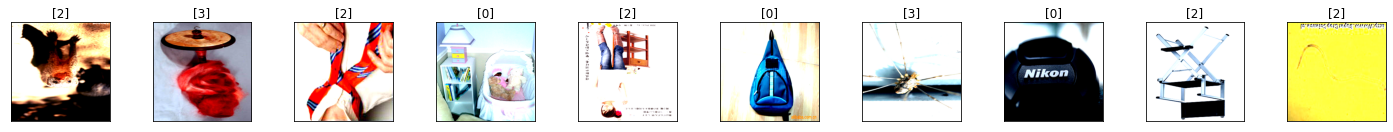

In [47]:
dataiter = iter(loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

In [46]:
class ImagenetColorization(datasets.ImageNet):
    def __init__(self, path, transforms, size, train=True):
        super().__init__(path)
        self.transforms = transforms
        self.size = size
        self.indexes = self.create_idx()

    def create_idx(self):
        indexes = {}
        i = 0
        while len(indexes) < (self.size):
            r=random.randint(0,1281166)
            if r not in indexes.values() : 
                indexes[i] = r
                i +=1

        return indexes

    def __len__(self):
        return len(self.indexes)

    def __getitem__(self, index):
        index = self.indexes[index]
        im, _ = super().__getitem__(index)
        grayscale = T.Compose([transforms.Grayscale(num_output_channels=3)])
        grayImg = grayscale(im)
        return self.transforms(grayImg), self.transforms(im)

In [21]:
colorDataset = ImagenetColorization('data/',transform, 1000)

In [22]:
loader = DataLoader(colorDataset, batch_size=10, shuffle=True)

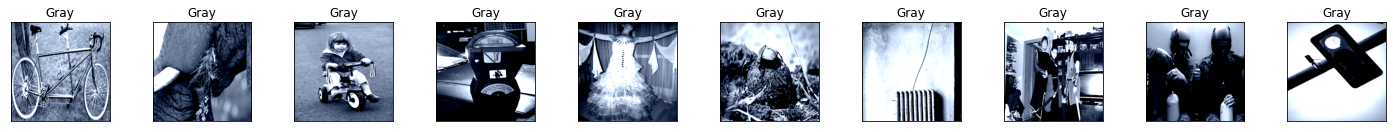

In [23]:
dataiter = iter(loader)
images, _ = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("Gray")

In [29]:
indexes = {}
idx_list = []
i = 0
while i < (self.size/4):
    r=random.randint(0,1281166)
    if r not in idx_list: 
        idx_list.append(r)
        i +=1
d = 0    
k = 0
while d < 4:
    for v in idx_list:
        indexes[k]=v
        k+=1
    d+=1

In [30]:
idx_list

[3, 10, 2, 8, 9]

In [31]:
indexes

{0: 3,
 1: 10,
 2: 2,
 3: 8,
 4: 9,
 5: 3,
 6: 10,
 7: 2,
 8: 8,
 9: 9,
 10: 3,
 11: 10,
 12: 2,
 13: 8,
 14: 9,
 15: 3,
 16: 10,
 17: 2,
 18: 8,
 19: 9}

In [ ]:
key = index
index = self.indexes[index]
im, _ = super().__getitem__(index)

if key < self.size/4:
    dgr = 0
elif key >= self.size/4 and key < self.size/2:
    dgr = 90
elif key >= self.size/2 and key < 3*self.size/4:
    dgr = 180
else:
    dgr = 270
    
self.category = self.labelDict[dgr]
return rotate(self.transforms(im),dgr), self.category

In [41]:
size = 20
for i in range(size):
    if i < size/4:
        print(0)
    elif i >= size/4 and i < size/2:
        print(90)
    elif i >= size/2 and i < 3*size/4:
        print(180)
    else:
        print(270)

0
0
0
0
0
90
90
90
90
90
180
180
180
180
180
270
270
270
270
270
